In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
#1. Preparing the data
# The data, split between train and test sets:
num_classes = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# print the shape information
print('single item shape:',x_train[0].shape)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# reshape the trainning data
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)

# change the type： float32 for GPU computations
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize the data
# x_train =keras.utils.normalize(x_train,axis=-1,order=2) #If use this function to normalize the data, it would have some problem with test accuracy, why this happened
# y_train =keras.utils.normalize(y_train,axis=-1,order=2)                 
## normalization
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

single item shape: (32, 32, 3)
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
def experiment(x_train, y_train,x_test, y_test,epochs,batch_size,num_neurons,learning_rates,activation_func,dropout_rates,num_classes):
    #2.Building the model
    model = Sequential()
    model.add(Dense(num_neurons, activation= activation_func, input_shape=(3072,)))
    model.add(Dropout(dropout_rates))
    
    model.add(Dense(num_neurons, activation= activation_func))
    model.add(Dropout(dropout_rates))
    
    model.add(Dense(512, activation=activation_func))
    model.add(Dropout(dropout_rates))
    
    model.add(Dense(10, activation=activation_func))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    
#     sgd = SGD(lr=learning_rates, decay=1e-6, momentum=0.9, nesterov=True)
    sgd = SGD(momentum=0.9)

    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='loss', min_delta=-0.05, patience=0, verbose=0,
                             mode='auto')
    call_backs = []
    call_backs.append(early_stopping)
    
    #3.Trainning the data
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=2,
                        validation_split=0.2,
#                         validation_data=(x_test, y_test), #if use this parameter, the validation accuracy is bad,which is 0.1
                       callbacks=call_backs)
    #4.Evaluating the model
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return history


In [0]:
def plot_accuracy(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()
  

In [0]:
def plot_accuracy_loss(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  epochs = range(1, len(loss_values) + 1)
  acc = history_dict['acc']
  val_acc = history_dict['val_acc']

  plt.subplot(1,2,1)
  plt.plot(epochs, loss_values, 'bo', label='Training loss')
  plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')

  plt.subplot(1,2,2)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')

  plt.legend()
  plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
__________

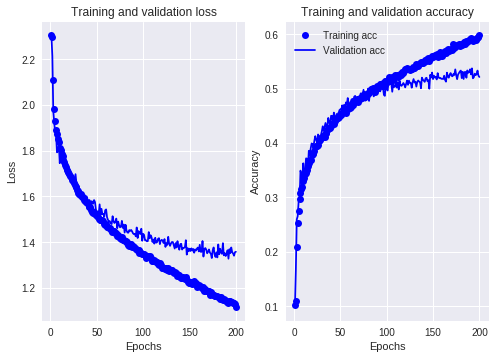

In [10]:
# Experiment Test
epochs = 200
batch_size = 128
num_neurons = 1024
learning_rates = 0.1
activation_func ='relu'
#drop rate could not be too high, otherwise the result would be underfitting
dropout_rates = 0.5 
num_classes = 10
history = experiment(x_train, y_train,x_test, y_test,epochs,batch_size,num_neurons,learning_rates,activation_func,dropout_rates,num_classes)
plot_accuracy_loss(history)

--------------------------------Experiment Start-------------------------------------
epochs: 150 batch_size:128 num_neurons: 512 learning_rates: 0.01 activation_func: relu dropout_rates: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_15 (Drop

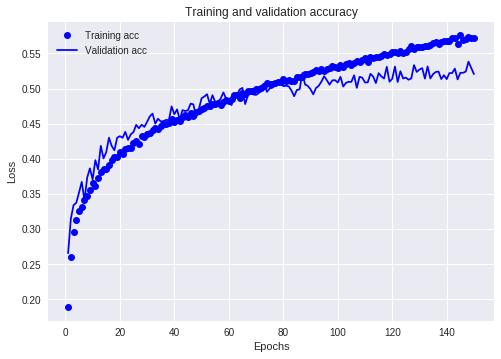

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 150 batch_size:128 num_neurons: 512 learning_rates: 0.01 activation_func: relu dropout_rates: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               262656   

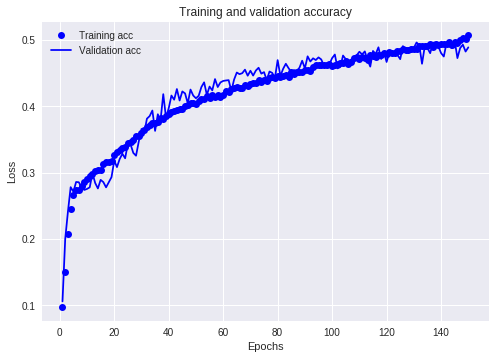

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 150 batch_size:128 num_neurons: 512 learning_rates: 0.02 activation_func: relu dropout_rates: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 512)               262656   

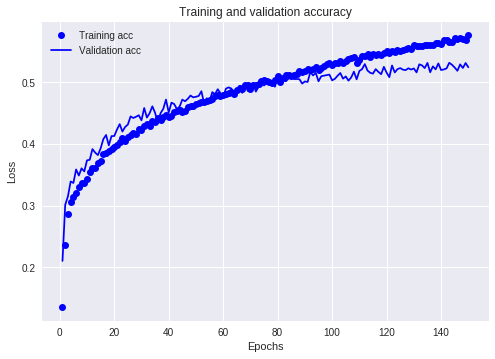

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 150 batch_size:128 num_neurons: 512 learning_rates: 0.02 activation_func: relu dropout_rates: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               262656   

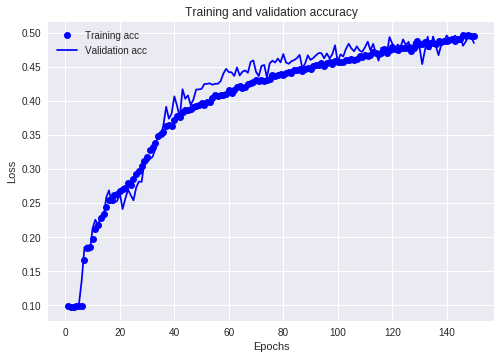

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 150 batch_size:128 num_neurons: 1024 learning_rates: 0.01 activation_func: relu dropout_rates: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_25 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_26 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 512)               524800  

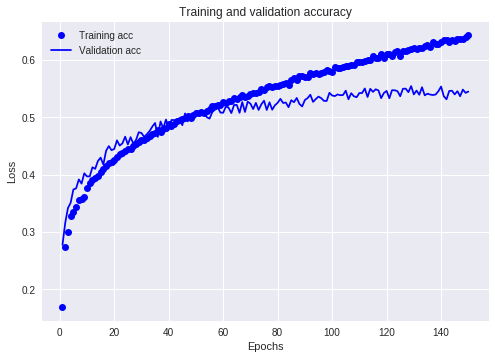

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 150 batch_size:128 num_neurons: 1024 learning_rates: 0.01 activation_func: relu dropout_rates: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_28 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_29 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 512)               524800  

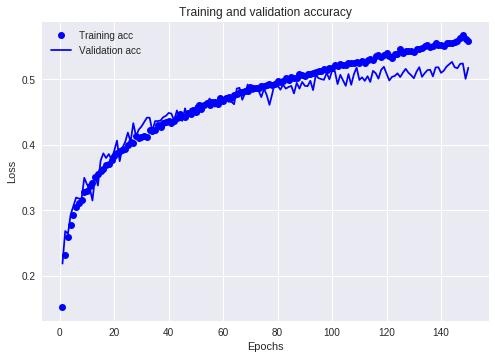

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 150 batch_size:128 num_neurons: 1024 learning_rates: 0.02 activation_func: relu dropout_rates: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_31 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_32 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_53 (Dense)             (None, 512)               524800  

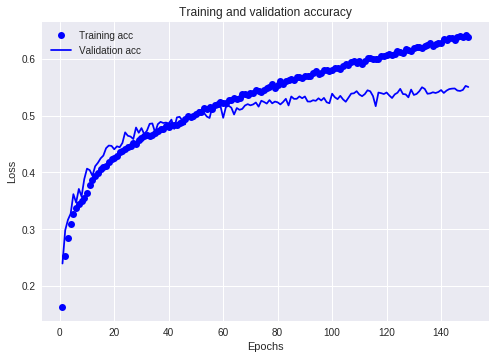

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 150 batch_size:128 num_neurons: 1024 learning_rates: 0.02 activation_func: relu dropout_rates: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_34 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_35 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 512)               524800  

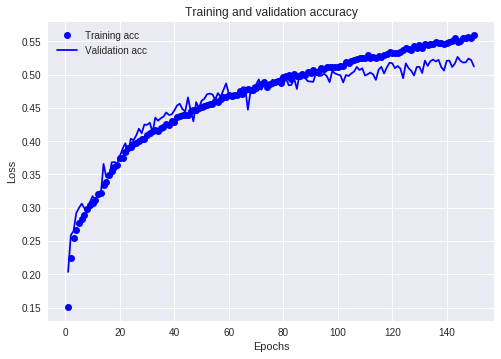

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 150 batch_size:256 num_neurons: 512 learning_rates: 0.01 activation_func: relu dropout_rates: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_37 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_38 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 512)               262656   

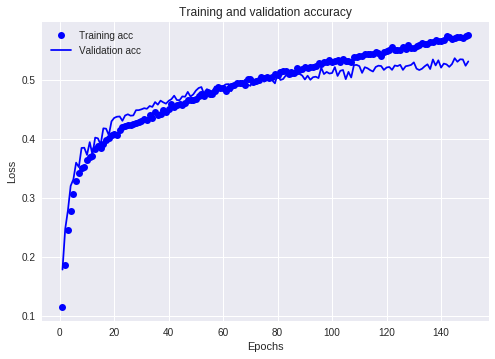

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 150 batch_size:256 num_neurons: 512 learning_rates: 0.01 activation_func: relu dropout_rates: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_40 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_41 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 512)               262656   

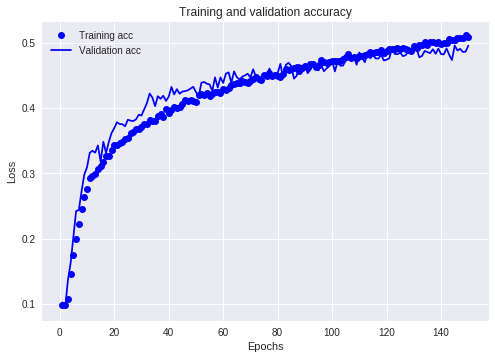

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 150 batch_size:256 num_neurons: 512 learning_rates: 0.02 activation_func: relu dropout_rates: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_43 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_44 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 512)               262656   

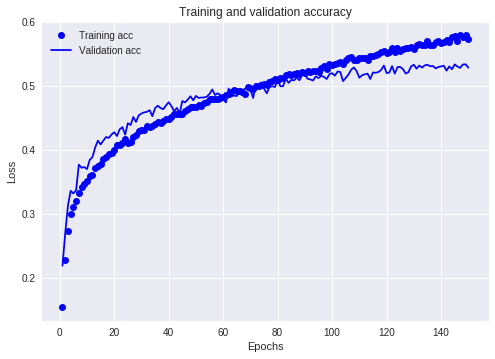

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 150 batch_size:256 num_neurons: 512 learning_rates: 0.02 activation_func: relu dropout_rates: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_46 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_47 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 512)               262656   

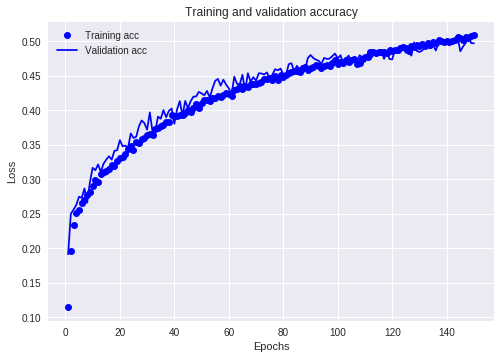

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 150 batch_size:256 num_neurons: 1024 learning_rates: 0.01 activation_func: relu dropout_rates: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_49 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_82 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_50 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_83 (Dense)             (None, 512)               524800  

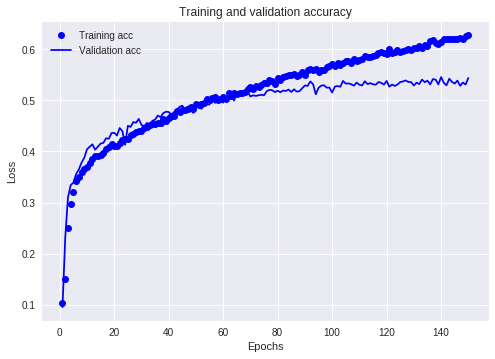

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 150 batch_size:256 num_neurons: 1024 learning_rates: 0.01 activation_func: relu dropout_rates: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_52 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_87 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_53 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_88 (Dense)             (None, 512)               524800  

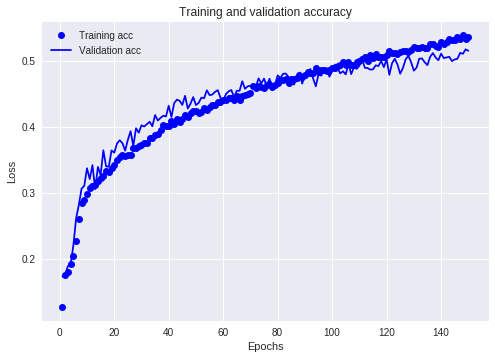

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 150 batch_size:256 num_neurons: 1024 learning_rates: 0.02 activation_func: relu dropout_rates: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_55 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_92 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_56 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_93 (Dense)             (None, 512)               524800  

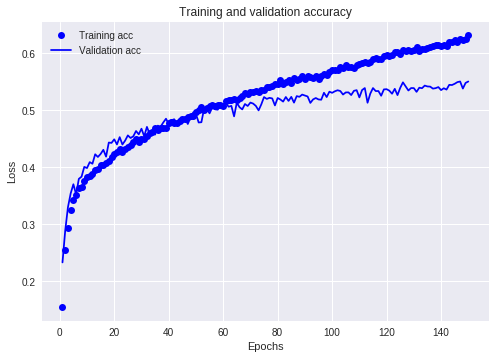

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 150 batch_size:256 num_neurons: 1024 learning_rates: 0.02 activation_func: relu dropout_rates: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_58 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_97 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_59 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_98 (Dense)             (None, 512)               524800  

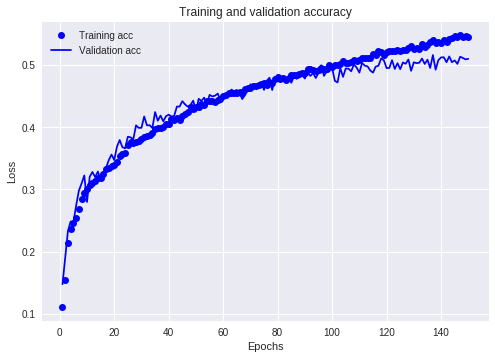

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 200 batch_size:128 num_neurons: 512 learning_rates: 0.01 activation_func: relu dropout_rates: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_61 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_62 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 512)               262656   

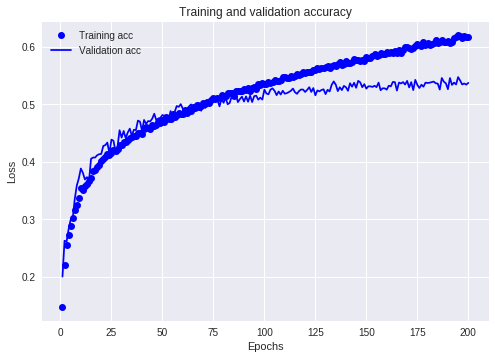

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 200 batch_size:128 num_neurons: 512 learning_rates: 0.01 activation_func: relu dropout_rates: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_64 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_65 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 512)               262656   

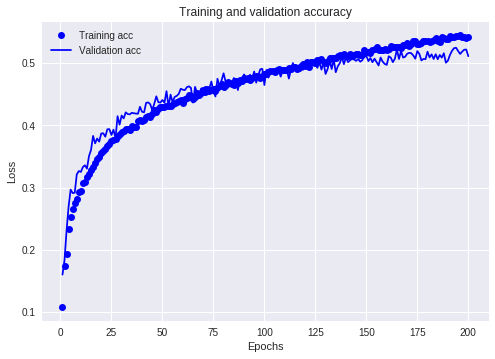

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 200 batch_size:128 num_neurons: 512 learning_rates: 0.02 activation_func: relu dropout_rates: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_67 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_68 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_113 (Dense)            (None, 512)               262656   

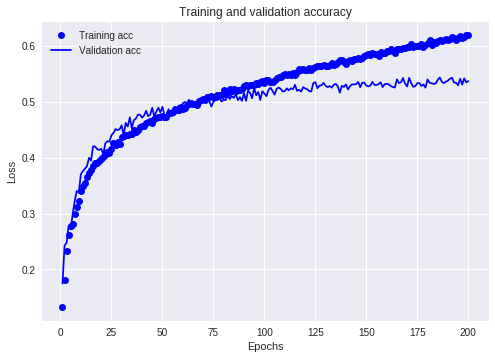

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 200 batch_size:128 num_neurons: 512 learning_rates: 0.02 activation_func: relu dropout_rates: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_70 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_117 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_71 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_118 (Dense)            (None, 512)               262656   

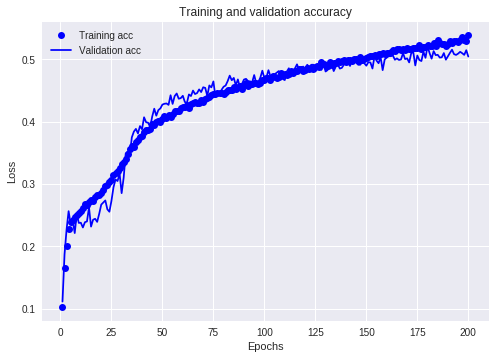

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 200 batch_size:128 num_neurons: 1024 learning_rates: 0.01 activation_func: relu dropout_rates: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_73 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_122 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_74 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_123 (Dense)            (None, 512)               524800  

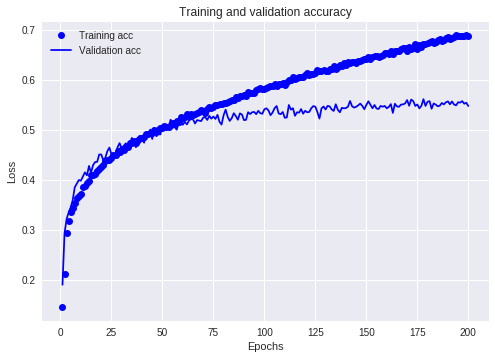

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 200 batch_size:128 num_neurons: 1024 learning_rates: 0.01 activation_func: relu dropout_rates: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_76 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_127 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_77 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_128 (Dense)            (None, 512)               524800  

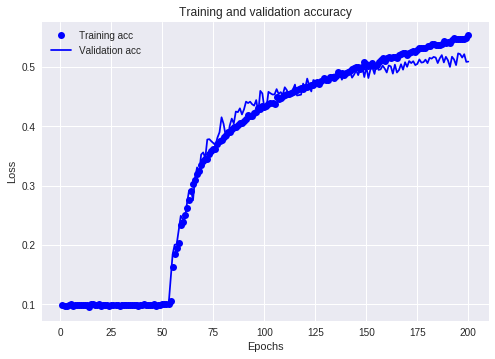

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 200 batch_size:128 num_neurons: 1024 learning_rates: 0.02 activation_func: relu dropout_rates: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_79 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_132 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_80 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_133 (Dense)            (None, 512)               524800  

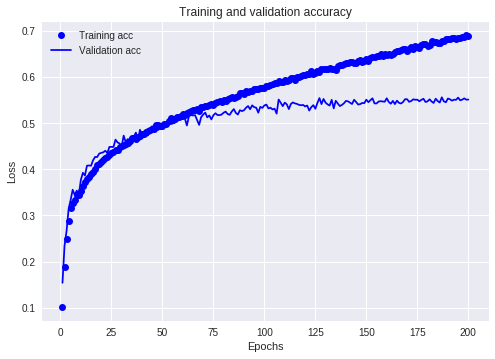

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 200 batch_size:128 num_neurons: 1024 learning_rates: 0.02 activation_func: relu dropout_rates: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_82 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_137 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_83 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_138 (Dense)            (None, 512)               524800  

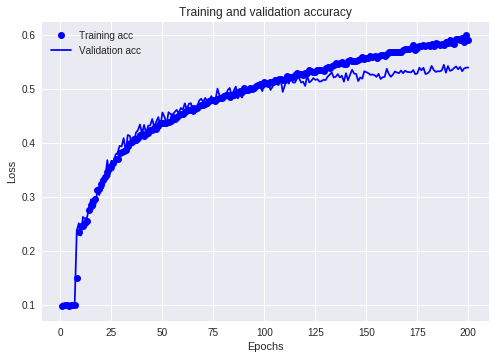

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 200 batch_size:256 num_neurons: 512 learning_rates: 0.01 activation_func: relu dropout_rates: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_85 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_142 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_86 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_143 (Dense)            (None, 512)               262656   

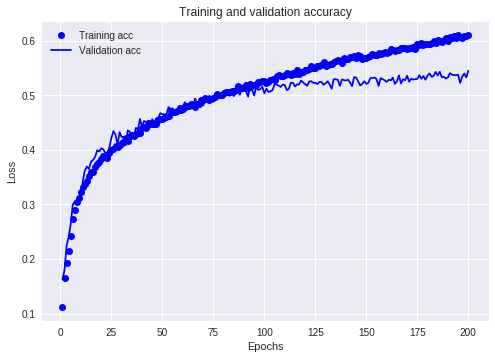

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 200 batch_size:256 num_neurons: 512 learning_rates: 0.01 activation_func: relu dropout_rates: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_146 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_88 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_147 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_89 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_148 (Dense)            (None, 512)               262656   

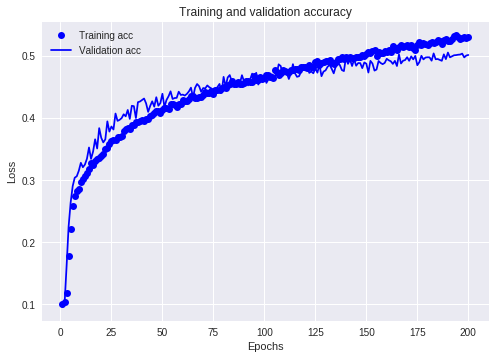

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 200 batch_size:256 num_neurons: 512 learning_rates: 0.02 activation_func: relu dropout_rates: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_151 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_91 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_152 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_92 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_153 (Dense)            (None, 512)               262656   

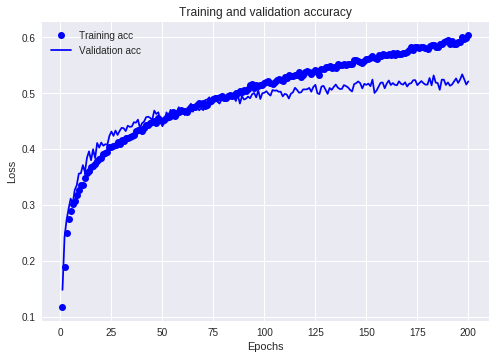

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 200 batch_size:256 num_neurons: 512 learning_rates: 0.02 activation_func: relu dropout_rates: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dropout_94 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_157 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_95 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_158 (Dense)            (None, 512)               262656   

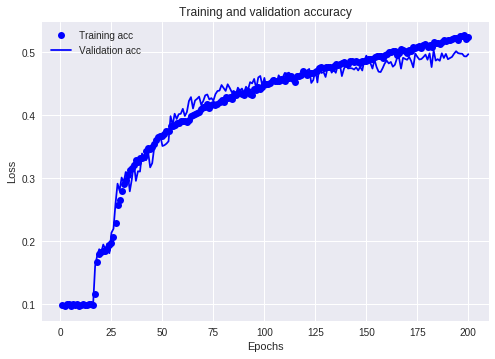

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 200 batch_size:256 num_neurons: 1024 learning_rates: 0.01 activation_func: relu dropout_rates: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_97 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_162 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_98 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_163 (Dense)            (None, 512)               524800  

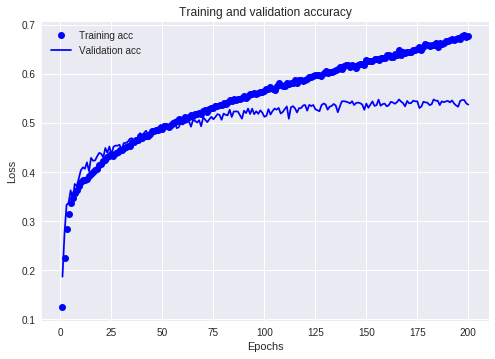

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 200 batch_size:256 num_neurons: 1024 learning_rates: 0.01 activation_func: relu dropout_rates: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_100 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_167 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_101 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_168 (Dense)            (None, 512)               524800  

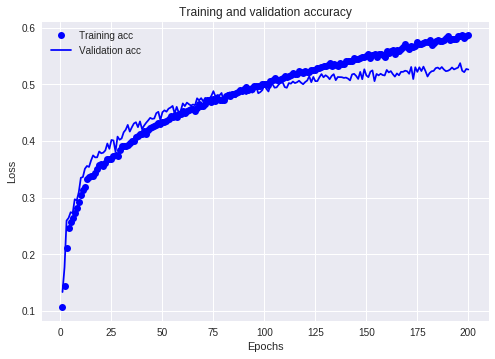

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 200 batch_size:256 num_neurons: 1024 learning_rates: 0.02 activation_func: relu dropout_rates: 0.4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_103 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_172 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_104 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_173 (Dense)            (None, 512)               524800  

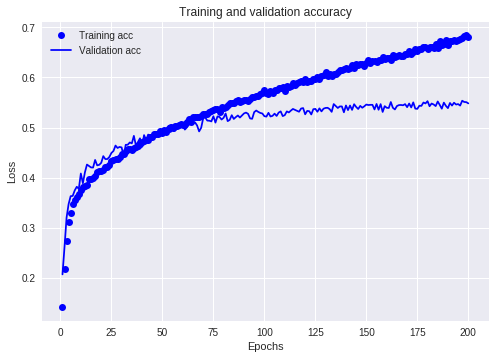

--------------------------------Experiment End-------------------------------------
--------------------------------Experiment Start-------------------------------------
epochs: 200 batch_size:256 num_neurons: 1024 learning_rates: 0.02 activation_func: relu dropout_rates: 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dropout_106 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_177 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_107 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_178 (Dense)            (None, 512)               524800  

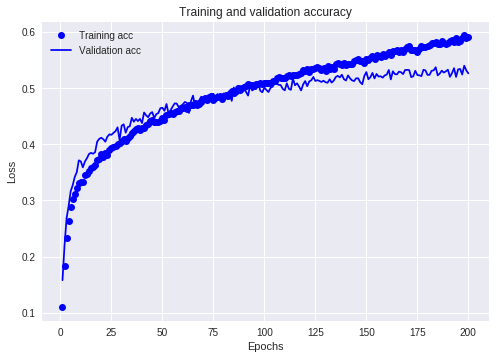

--------------------------------Experiment End-------------------------------------


In [0]:
epochs = [150,200]
batch_size = [128,256]
num_neurons = [512,1024]
learning_rates = [0.01,0.02]
activation_func =['relu']
dropout_rates = [0.4,0.5]

for epoch_item in epochs :
    for batch_item in batch_size:
      for neurons_item in num_neurons:
        for rate_item in learning_rates:
          for func_item in activation_func:
              for drop_item in dropout_rates:
                print("--------------------------------Experiment Start-------------------------------------")
                exper_parameters = 'epochs: '+ str(epoch_item) + ' batch_size:'+ str(batch_item) + ' num_neurons: ' +str(neurons_item) + ' learning_rates: '+str(rate_item) + ' activation_func: ' + str(func_item) + ' dropout_rates: ' + str(drop_item)
                print(exper_parameters)
                
                history = experiment(x_train, y_train,x_test, y_test,epoch_item,batch_item,neurons_item,rate_item,func_item,drop_item,num_classes)
                plot_accuracy(history)
                
                print("--------------------------------Experiment End-------------------------------------")
                